<!-- Template 
Auteur: Olivier Pannekoucke
Date: 27/09/2017
Description: 
   Introduction aux notebook jupyter et à la création/valorisation d'un travail scientifique.
-->
<center>
<h1> TD 1 - Filtre de Kalman</h1>
    <h3>À rendre pour la séance du ???<h3>
<h5>Étudiant: Jed MOUTAHIR </h5>
</center>

<h3 style="font-variant:small-caps;"><center>Résumé</center></h3>

<div style="margin:0 50px 0 50px">
<p style="background:rgb(230,230,255)">
Dans un premier temps, la dynamique de l'incertitude est introduite sous forme d'un problème conduisant aux équations du filtre de Kalman. Ces équations sont ensuite illustrées dans le cadre d'une expérience numérique, similaire à celles rencontrées dans la prévision du temps (ici chimie atmosphérique). Pour finir, on s'intérroge sur les problématiques intervenants en grande dimension: qu'est-ce qu'une distribution Gaussienne en grande dimension ?
</p>
<p>
<b>keywords</b>: <i> Filtre de Kalman, Dynamique incertitude, Malédiction dimension.</i>
</p>
</div>

<h2 style="background:LightCoral">
    Envoyez le fichier .ipynb à l'adresse olivier.pannekoucke@meteo.fr <br><br>
    <center>avec en <b>objet du mail: _HPC_TD1 </b></center> 
</h2>

--- 
<center><h2> Content </h2></center>

 1. [Introduction](#introduction)
 1. [Construction des équations du filtre de Kalman](#problem-kalman)
     * [Q2.1 Écrire cette dynamique sous la forme d'une équation différentielle ordinaire d'ordre $1$](#Q2.1)
     * [Q2.2 Résoudre formellement cette dynamique](#Q2.2)
     * [Q2.3 Modélisation de l'incertitude](#Q2.3)
     * [Q2.4 Introduction d'informations issue d'observations](#Q2.4)
 1. [Expérience numérique](#numeric)
     * [Q3.1 Construire la matrice M représentant la dynamique sur un pas de temps](#Q3.1) 
     * [Q3.2 Construire ue condition initiale](#Q3.2) 
     * [Q3.3 Cycle d'assimilation et de prévision](#Q3.3)
     * [Q3.4 Analyser et interpréter les résultats des cycles d'assimilation de données](#Q3.4)
 1. [Distribution Gaussienne en grande dimension](#curse-dimensionality)
     * [Q4.1 Exploration des échantillons d'une Gaussienne](#Q4.1)
 1. [Conclusion](#conclusion)
     * [Q5 Conclure le travail](#Q5)
---

## Introduction <a id='introduction'/>

###  Quel est le travail attendu ?


Du point de vue de l'évaluation: le questionnement personnel et la conduite d'expériences numériques pertinentes seront valorisés. 

Vous réponderez à l'ensemble des questions en prenant soin à la rédaction.

In [1]:
# En guise d'exemple voici un petit code pour insérer des figures..  voir également 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

## 2. Construction des équations du filtre de Kalman <a id='problem-kalman'/>

Soit l'oscillateur harmonique donné par la dynamique 
$$\ddot x+\omega^2 x =0$$

<a id='Q2.1'/>
<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">
<b> Q2.1 Écrire cette dynamique sous la forme d'une équation différentielle ordinaire d'ordre $1$<b>
</div>

<div style="background:">
<b>Réponse:</b> <br> 

</div>

Soit $\mathbf{u} = (x, \dot{x})$ qui represente la position $x(t)$ et la vitesse $\dot{x}(t)$ :

L'oscillateur harmonique est donné par l'équation différentielle d'ordre 2 suivante :

$ \ddot{x} + \omega^2 x = 0 $

En utilisant un vecteur $\mathbf{u} = (x, \dot{x})$, nous pouvons réécrire cette équation comme un système d'équations différentielles d'ordre 1 :

$$
\begin{cases}
\dot{\mathbf{u}}_1 &= \mathbf{u}_2 \\
\dot{\mathbf{u}}_2 &= -\omega^2 \mathbf{u}_1
\end{cases}
$$
On pose
$$
J = \begin{pmatrix}
0 & 1 \\
-\omega^2 & 0
\end{pmatrix}
$$

Donc le systeme s'écrit :
$$
\dot{\mathbf{u}} = J u
$$

<a id='Q2.2' />


<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">
<b> Q2.2 Résoudre formellement cette dynamique<b>
</div>

<div style="background:">
<b>Réponse:</b> <br> 

</div>

La solution générale de ce système d'équations différentielles peut être trouvée en diagonalisant la matrice J. La matrice J est une matrice antisymétrique, ce qui signifie que ses valeurs propres seront imaginaires pures. Les valeurs propres de J sont $ \lambda_1 = i\omega $ et $ \lambda_2 = -i\omega $.

En diagonalisant J, nous obtenons la matrice de passage P et sa matrice inverse P⁻¹ comme suit :

$$
P = \begin{pmatrix}
i\omega & -i\omega \\
1 & 1
\end{pmatrix}
$$

$$
P^{-1} = \frac{1}{2i\omega} \begin{pmatrix}
1 & i\omega \\
-1 & i\omega
\end{pmatrix}
$$

Maintenant, nous pouvons introduire une nouvelle variable, $\mathbf{v}$, définie comme suit :

$$
\mathbf{v} = P^{-1} \mathbf{u}
$$

En multipliant les deux côtés de l'équation $\dot{\mathbf{u}} = J \mathbf{u}$ par $P^{-1}$, nous obtenons :

$$
P^{-1} \dot{\mathbf{u}} = P^{-1} J \mathbf{u}
$$

En utilisant la dérivée de la multiplication de matrices, nous pouvons écrire ceci comme :

$$
\dot{\mathbf{v}} = P^{-1} J \mathbf{u}
$$

Maintenant, nous pouvons remplacer $P^{-1} J$ par une nouvelle matrice A, qui est diagonale avec les valeurs propres $\lambda_1$ et $\lambda_2$ :

$$
A = P^{-1} J = \begin{pmatrix}
i\omega & 0 \\
0 & -i\omega
\end{pmatrix}
$$

Le système devient donc :

$$
\dot{\mathbf{v}} = A \mathbf{u}
$$

Ceci est un système de deux équations différentielles du premier ordre découplées. Les solutions de ce système peuvent être écrites de manière générale comme :

$$
\mathbf{v}(t) = \mathbf{v}_0 e^{At}
$$

où $\mathbf{v}_0$ est le vecteur de conditions initiales. Ensuite, en utilisant la relation $\mathbf{v} = P^{-1} \mathbf{u}$, nous pouvons exprimer $\mathbf{u}(t)$ en termes de $\mathbf{v}(t)$ :

$$
\mathbf{u}(t) = P \mathbf{v}(t)
$$

En substituant l'expression de $\mathbf{v}(t)$, nous obtenons la solution finale pour $\mathbf{u}(t)$ en termes de $\mathbf{u}_0$ (le vecteur de conditions initiales) :

$$
\mathbf{u}(t) = P \mathbf{v}_0 e^{At}
$$

Cela donne les solutions pour $x(t)$ et $\dot{x}(t)$ en fonction des conditions initiales : 

On pose les conditions initiales $x(0) = x_0$ et $\dot{x}(0) = \dot{x}_0$.

$$
\mathbf{u}(0) = \begin{pmatrix}
x(0) \\
\dot{x}(0)
\end{pmatrix} = \begin{pmatrix}
x_0 \\
\dot{x}_0
\end{pmatrix}
$$

$$
P \mathbf{v}_0 = \begin{pmatrix}
x_0 \\
\dot{x}_0
\end{pmatrix}
$$

Nous obtenons :

$$
\mathbf{v}_0 = P^{-1} \begin{pmatrix}
x_0 \\
\dot{x}_0
\end{pmatrix} = \frac{1}{2i\omega} \begin{pmatrix}
1 & i\omega \\
-1 & i\omega
\end{pmatrix} \begin{pmatrix}
x_0 \\
\dot{x}_0
\end{pmatrix}
$$

En effectuant la multiplication matricielle, nous obtenons :

$$
\mathbf{v}_0 = \frac{1}{2i\omega} \begin{pmatrix}
x_0 + i\omega \dot{x}_0 \\
-x_0 + i\omega \dot{x}_0
\end{pmatrix}
$$

Maintenant que nous avons $\mathbf{v}_0$, nous pouvons utiliser l'expression générale $\mathbf{u}(t) = P \mathbf{v}_0 e^{At}$ pour trouver $\mathbf{u}(t)$ à partir du temps $t$ :

$$
\mathbf{u}(t) = P \mathbf{v}_0 e^{At}
$$

En effectuant cette multiplication matricielle et en prenant en compte les valeurs propres $\lambda_1 = i\omega$ et $\lambda_2 = -i\omega$ de la matrice $A$, nous obtenons :

$$
\mathbf{u}(t) = \frac{1}{2i\omega} \begin{pmatrix}
1 & i\omega \\
-1 & i\omega
\end{pmatrix} \begin{pmatrix}
x_0 + i\omega \dot{x}_0 \\
-x_0 + i\omega \dot{x}_0
\end{pmatrix} e^{At}
$$

En simplifiant cette expression, nous obtenons les composantes de $\mathbf{u}(t)$ :

$$
\begin{align*}
u_1(t) &= \frac{1}{2i\omega} [(x_0 + i\omega \dot{x}_0)e^{i\omega t} + (-x_0 + i\omega \dot{x}_0)e^{-i\omega t}] \\
u_2(t) &= \frac{1}{2i\omega} [(x_0 + i\omega \dot{x}_0)e^{i\omega t} - (-x_0 + i\omega \dot{x}_0)e^{-i\omega t}]
\end{align*}
$$

Maintenant, nous pouvons extraire les expressions pour $x(t)$ et $\dot{x}(t)$ en utilisant les composantes de $\mathbf{u}(t)$ :

$$
\begin{align*}
x(t) &= u_1(t) = \frac{1}{2i\omega} [(x_0 + i\omega \dot{x}_0)e^{i\omega t} + (-x_0 + i\omega \dot{x}_0)e^{-i\omega t}] \\
\dot{x}(t) &= u_2(t) = \frac{1}{2i\omega} [(x_0 + i\omega \dot{x}_0)e^{i\omega t} - (-x_0 + i\omega \dot{x}_0)e^{-i\omega t}]
\end{align*}
$$


<a id='Q2.3'/>

<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">
<b> Q2.3 Modélisation de l'incertitude </b><br>
  On suppose que la condition initiale est <b>imparfaitement connue</b>
    <ol>
        <li> Comment modéliser cette notion ?
        <li> Comment évolue l'incertitude si la distribution initiale est la Gaussienne $X_0\sim\mathcal{N}(\textbf{x}_0,\textbf{P}_0)$
        <li> Commenter le résultat
        <li> Illustrer à l'aide d'un schéma le cas $\omega^2=1$ et $\textbf{P}_0=\textbf{I}$ -- dessin à faire sur papier, appeler l'enseignant pour validation.
    </ol>        
</div>

<div style="background:">
<b>Réponse:</b> <br>

1. Pour modéliser l'incertitude sur la condition initiale, on peut utiliser des statistiques et des distributions de probabilité. En particulier, on peut modéliser l'incertitude sur la condition initiale en utilisant une distribution de probabilité, comme la distribution normale (Gaussienne). Cela signifie que la condition initiale n'est pas un nombre précis, mais plutôt une variable aléatoire avec une certaine moyenne et une certaine variance.

2. Si la condition initiale est modélisée comme une variable aléatoire Gaussienne $X_0 \sim \mathcal{N}(\mathbf{x}_0, \mathbf{P}_0)$, où $\mathbf{x}_0$ est le vecteur moyen de la distribution et $\mathbf{P}_0$ est la matrice de covariance, alors l'incertitude évolue au fil du temps en suivant les équations du système dynamique. En d'autres termes, l'incertitude sur la condition initiale se propage dans le temps en fonction de la dynamique du système.

3. Le résultat est que l'incertitude sur la condition initiale se propage dans le temps en suivant les lois de la dynamique du système. Plus précisément, la variance de la distribution de probabilité de la condition initiale augmente ou diminue en fonction de la manière dont le système évolue. Si le système est stable, l'incertitude peut rester relativement constante. Si le système est instable, l'incertitude peut augmenter rapidement.

4. TODO
</div>

<a id='Q2.4'/>  

<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">
<b> Q2.4 Introduction de l'information issue d'observations </b><br>
  Supposons qu'on observe le système suivant sa première composante (le premier casier) $x_1$, où $\textbf{x}=(x_1,x_2)$, telle que $x_1 = \textbf{H}\,\textbf{x}$
    <ol>
        <li> Quelles sont les positions possibles pour l'état réel du système ?
        <li> Supposons que l'observation soit imparfaite $Y_0\sim\mathcal{N}(\textbf{H}\,\mathbf{x}^t,\textbf{R}_o)$ (avec $\mathbf{x}^t$ l'état réel du système à un instant donné)
            <ol>
        <li> Commenter mélanger les sources d'informations venant:
                <ol><li>de la dynamique du modèle et,</li><li> des observations ?</li></ol>
        <li> Résoudre l'équation obtenue
        <li>Faire la synthèse des résultats dans une conclusion intermédiaire
            </ol>
    </ol>        
</div>

<div style="background:lightBlue">
<b>Réponse:</b> <br> 
    (répondre ici)
</div>

<div style="background:lightGreen">
<b>Conclusion intermédiaire:</b> <br> 
    (Donnez vos conclusions ici)
</div>

## 3. Expérience numérique <a id='numeric'/>

l'objectif est de construire une expérience d'assimilation de données pour le modèle d'advection
$$\partial_t \alpha + u\partial_x\alpha = 0$$
où $u$ désigne une vitesse. 

Ce type de dynamique se rencontre dans le cadre de la prévision de la qualité de l'air, en chimie atmosphérique.

### **Implémentation de la dynamique & construction d'une 'solution' de référence**

#### **Modèle dynamiqe et sa représentation matricielle**

In [2]:
# Construction d'un modèle de prévision
class Transport(object):
    """ The `Transport` class is a numerical discretization for a simplified advection equation """
    def __init__(self, n=100, L=1.,u=1.):
        self.L = L
        self.n = n
        self.dx = L/n
        self.i = np.asarray(np.arange(n),dtype=int) 
        self.x = np.arange(n)*self.dx
        self.u = u
        self.dt = self.dx/self.u
        
        
    def forecast(self,tq:int,xo):
        xf = xo[ (self.i-tq)%self.n ]
        return xf

In [3]:
model = Transport()

<a id='Q3.1'/>

<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">    
<b>Q3.1 Peut-on représenter l'intégration de la dynamique sur un intervalle temporelle sous la forme d'une matrice 
   ? Si oui, proposez une méthode (simple) pour construire cette matrice .. </b>
</div>

<div style="background:">
<b>Réponse:</b> <br> 
    Oui, c'est une simple matrice de permution circulaire.
</div>

In [4]:
# Etat initial 'vrai'
xt0 = np.cos(2*np.pi*model.x/model.L)+2

In [5]:
def plot_field(state,title=None,label=None): 
    """ Plot of a scalar field over the domain """
    plt.plot(model.x, state,label=label) 
    ax=plt.gca()
    ax.set_xlabel("$x$")
    if title is not None:
        plt.title(title)

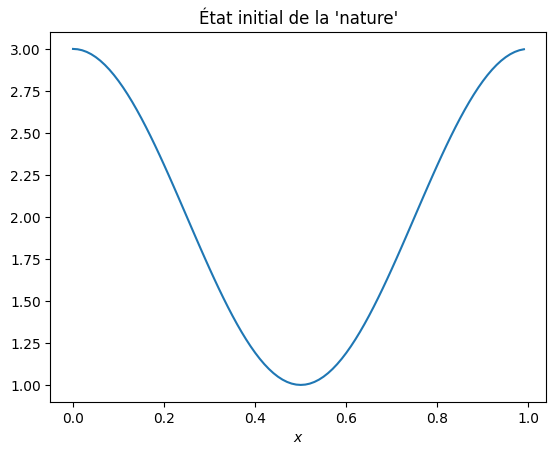

In [6]:
plot_field(xt0, title="État initial de la 'nature'")

### **Calcul d'une 'solution' de référence :** <span style='color:red'>"nature run"</span>

In [7]:
# Set time window
T = 100
times = np.arange(T)
# Compute the nature run
nature_run = {t:model.forecast(t,xt0) for t in times}

In [8]:
def animation(trajectory):
    from IPython.display import clear_output
    import time
    times = [t for t in trajectory]
    times.sort()
    T = times[-1]
    for t in times:
        clear_output(wait=True)
        plot_field(trajectory[t])
        plt.title(f"Time: {t/T:2.2}")
        plt.show()
        time.sleep(0.05)

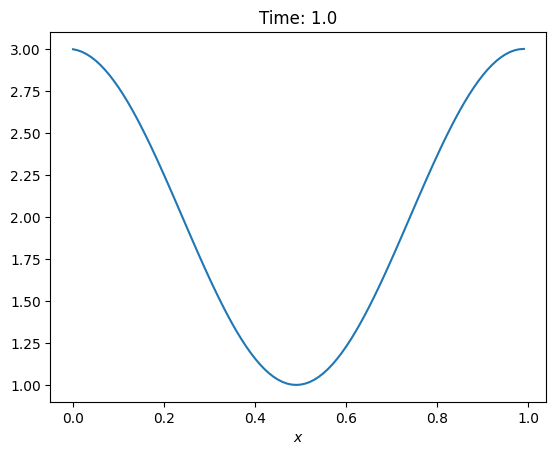

In [9]:
# Display animation of the nature run
animation(nature_run)

### **Définition de l'incertitude initiale**

#### **Construction de la matrice de covariance de l'incertitude sur la condition initiale**

In [10]:
def correlation_wrt(xm=model.n//2,l=3*model.dx): return np.exp( -0.5 * (model.x-model.x[xm])**2 / l**2 )

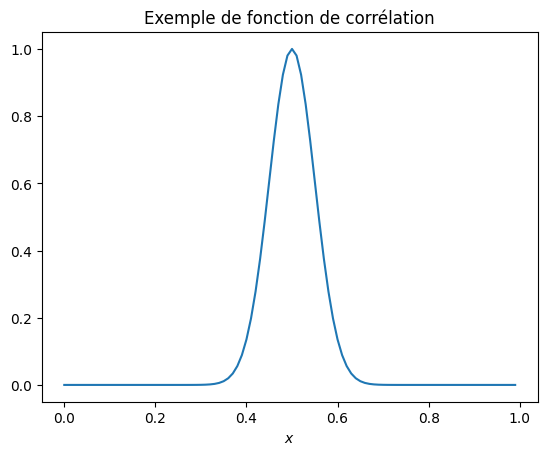

In [11]:
plot_field(correlation_wrt(l=5*model.dx), title="Exemple de fonction de corrélation")

In [12]:
def make_Pf0(l=3*model.dx):
    """ Construction d'une matrice de covariance 'homogène' """
    correlation = correlation_wrt(l=l)
    Pf = np.zeros((model.n,model.n))
    for k in range(model.n):
        Pf[(k+model.n//2)%model.n] =model.forecast(k,correlation) 
    return Pf
Pf0 = make_Pf0()

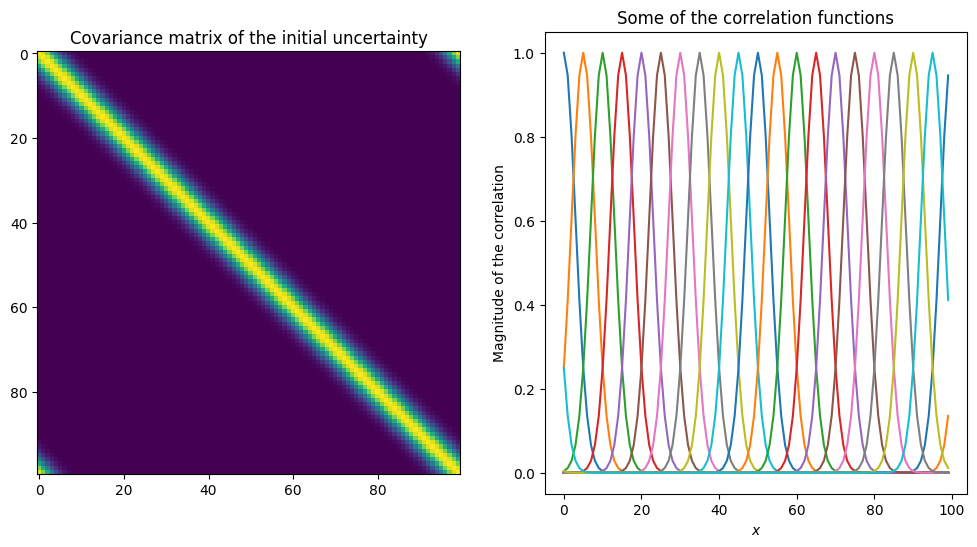

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(Pf0)
plt.title('Covariance matrix of the initial uncertainty')
plt.subplot(122)
plt.plot(Pf0[:,::5])
ax = plt.gca()
ax.set_xlabel('$x$')
ax.set_ylabel('Magnitude of the correlation')
plt.title('Some of the correlation functions');

#### **Construction de la moyenne l'incertitude sur la condition initiale**

Formellement la condition initiale $x^f_0$ est telle que $x^f_0 = x^t_0 + \varepsilon^f_0$ où 
$$\varepsilon^f_0 \sim \mathcal{N}(0,\textbf{P}^f_0)$$
Il faut donc construire une erreur $\varepsilon^f_0$ compatible avec la distribution Gaussienne initiale.

$\newcommand{\mI}{\mathbf{I}}
\newcommand{\ef}{\varepsilon^f}
\newcommand{\mP}{\mathbf{P}}
\newcommand{\mPf}{{\mP^f}}
$
<a id='Q3.2'/>

<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">    
<b>Q3.2 Construire une condition initiale.
    <ol><li>Montrez que si $\mathbf{\zeta}$ est un vecteur aléatoire suivant une loi normale centrée réduite, $\mathbf{\zeta}\sim\mathcal{N}(0,\mI)$, alors $\ef = \mPf^{1/2}\mathbf{\zeta}$ est un vecteur aléatoire de loi 
$\mathbf{\zeta}\sim\mathcal{N}(0,\mPf)$. 
        <li>Comment construit-on une réalisation du vecteur $\mathbf{\zeta}$ ?
        <li>Construire numériquement une réalisation du vecteur $\varepsilon^f_0$.
        <li>Construire une condition initiale $x^f_0=x^t_0+\varepsilon^f_0$
            </ol>
    </b>
</div>

<div style="background:">
<b>Réponse:</b> <br> 
</div>
1)

Soit $\boldsymbol{\zeta}$ un vecteur aléatoire gaussien multivarié de dimension $n$ tel que $\boldsymbol{\zeta} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$, où $\mathbf{I}$ est la matrice identité $n \times n$.

Soit $\mathbf{f} = \mathbf{P}^{1/2} \boldsymbol{\zeta}$. Supposons que $\mathbf{P}$ est une matrice de covariance. Nous voulons montrer que $\mathbf{f}$ suit une loi normale avec une certaine moyenne et une certaine matrice de covariance.

1. Espérance de $\mathbf{f}$ :
   L'espérance de $\mathbf{f}$ est donnée par :

   $$\mathbb{E}(\mathbf{f}) = \mathbf{P}^{1/2} \mathbb{E}(\boldsymbol{\zeta}) = \mathbf{P}^{1/2} \mathbf{0} = \mathbf{0}.$$

   Donc, la moyenne de $\mathbf{f}$ est zéro.

2. Matrice de covariance de $\mathbf{f}$ :
   La matrice de covariance de $\mathbf{f}$ est donnée par :

   $$\text{Cov}(\mathbf{f}) = \mathbb{E}(\mathbf{f} \mathbf{f}^\top) = \mathbb{E}(\mathbf{P}^{1/2} \boldsymbol{\zeta} (\mathbf{P}^{1/2} \boldsymbol{\zeta})^\top) = \mathbb{E}(\mathbf{P}^{1/2} \boldsymbol{\zeta} \boldsymbol{\zeta}^\top (\mathbf{P}^{1/2})^\top)$$

   En utilisant la propriété que $\boldsymbol{\zeta}$ suit une loi normale centrée réduite, nous savons que $\mathbb{E}(\boldsymbol{\zeta} \boldsymbol{\zeta}^\top) = \mathbf{I}$.

   Donc, nous pouvons simplifier davantage :

   $$\text{Cov}(\mathbf{f}) = \mathbf{P}^{1/2} \mathbf{I} (\mathbf{P}^{1/2})^\top = \mathbf{P}^{1/2} \mathbf{P}^{1/2} = \mathbf{Pf}.$$

   Ainsi, la matrice de covariance de $\mathbf{f}$ est $\mathbf{Pf}$.

En résumé, $\mathbf{f}$ a une moyenne nulle et une matrice de covariance $\mathbf{Pf}$. Par conséquent, $\mathbf{f}$ suit une loi normale multivariée $\mathcal{N}(\mathbf{0}, \mathbf{Pf})$.

2)

zeta = np.random.randn(n)

3)
```python
# vecteur aléatoire gaussien standard
zeta = np.random.randn(Pf.shape[0])

# Calcul epsilon_0^f
epsilon_0f = np.dot(L, zeta)
```

4)
```python
xf_0 = x_t_0 + epsilon_0f
```

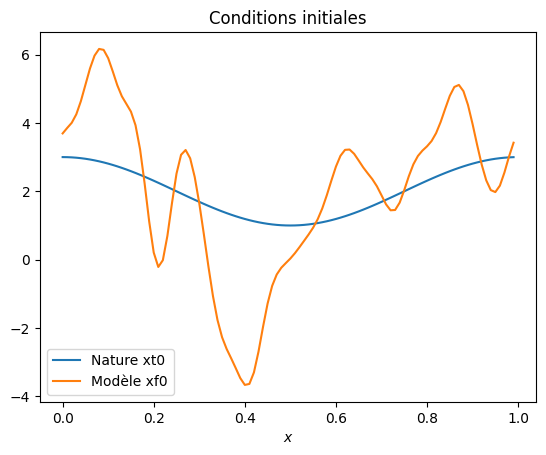

In [14]:
# Construction de la racine carré de P
[U,D,V] = np.linalg.svd(Pf0)
sqrtPf0 = U@np.sqrt(np.diag(D))@U.T
assert np.linalg.norm(sqrtPf0@sqrtPf0.T - Pf0)<1e-10  # Vérification que P^1/2 P^T/2 = P

# Construction d'une erreur initiale
m = np.zeros(model.n)
ef = np.random.multivariate_normal(m, Pf0)

# Construction de la condition initiale
xf0 = xt0 + sqrtPf0@ef

# Illustration et comparaison avec la nature
plot_field(xt0,label='Nature xt0')
plot_field(xf0,"Conditions initiales",label='Modèle xf0')
plt.legend()

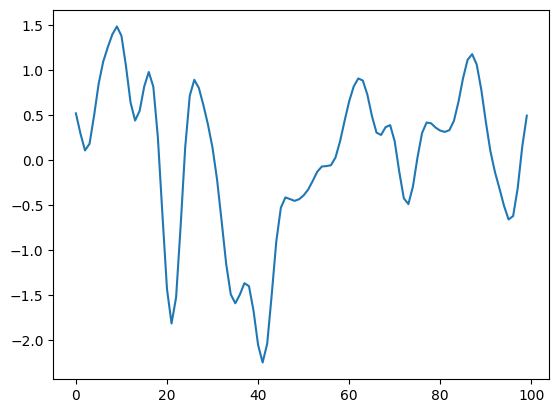

In [15]:
plt.plot(ef)

### **Définition d'un réseau d'observation et d'un générateur d'observations**

In [16]:
class ObsNetwork(object):
    def __init__(self, grid, vo=0.01, Lo=None,obs_position=None):
        self.grid=grid
        if obs_position is None:
            obs_position = list(range(grid.n//2,grid.n,3))
        self.obs_position = obs_position        
        self.p = len(obs_position)
        
        # set the observation opérator H,  the observational error covariance R and ist square-root
        self.vo=vo
        self.H, self.R, self.Rsqrt = self._make_H_R_sqrtR()
        
    def _make_H_R_sqrtR(self):
        H = np.zeros((self.p,self.grid.n))
        for o in range(self.p):
            H[o, self.obs_position[o]] = 1
        #H = np.asmatrix(H)
        R = self.vo*H @ H.T
        sqrtR = np.sqrt(self.vo)*H @H.T
        return H, R, sqrtR
        
    def generate_eo(self):
        zeta = np.random.normal(size=self.p)
        #zeta = np.asmatrix( zeta ).T
        eo = self.Rsqrt @ zeta
        return eo
        
    def get_yo(self,xt):
        # In this configuration: the observations are generated from the real state xt and the covariance matrix R
        eo = self.generate_eo()
        yo = self.H @ xt + eo
        return yo
    
    def plot_network(self):
        plt.plot(self.grid.x[self.obs_position], np.zeros(self.p)-0.5,'x', label='Network')
        ax=plt.gca()
        ax.set_xlim(self.grid.x[0], self.grid.x[-1])
        ax.set_ylim(-2.,5.)
        
    def plot_obs(self,yo):
        plt.plot(self.grid.x[self.obs_position], yo,'o',label='Obs.')
        self.plot_network()

In [17]:
network = ObsNetwork(model)

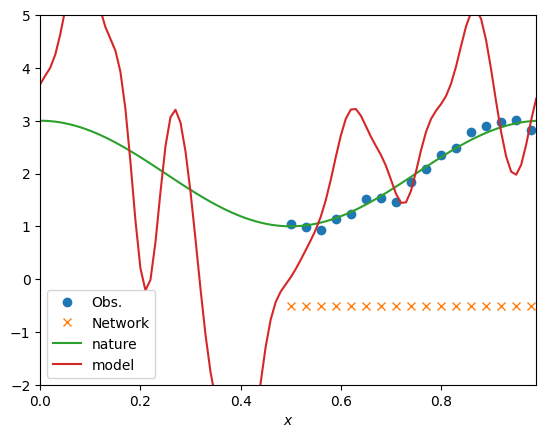

In [18]:
network.plot_obs(network.get_yo(xt0))
plot_field(xt0,label='nature')
plot_field(xf0,label='model')
plt.legend(loc='lower left')

### **Expérience d'assimilation de données**

In [19]:
def make_M(model):
    dt = 1
    M = np.zeros(2*(model.n,))
    dirac = np.zeros(model.n)
    for k in range(model.n):
        dirac[k] = 1.
        M[k,:] = model.forecast(dt,dirac)
        dirac[k] = 0.
    return M.T

M = make_M(model)

<a id='Q3.3'/>

<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">    
<b>Q3.3 Cycle d'assimilation et de prévision: <br>
    Complétez le code suivant pour implémenter des cycles d'assimilation reposant sur le filtre de Kalman
    </b>
</div>

In [20]:
# Set forecast uncertainty
Vf0 = 1.
Pf, Pfsqrt = Vf0*Pf0, np.sqrt(Vf0)*sqrtPf0
xt, xf = xt0, xf0


# Set observation network
R = network.R
H = network.H

I = np.eye(model.n)

SAVE={}

for t in times:
    # OSSE specific operation 
    yo = network.get_yo(xt)
    
    #
    # Analysis step
    #
    # a) Computation of the gain matrix
    K = Pf @ H.T @ np.linalg.inv(H @ Pf @ H.T + R)
    # b) Computation of the analysis state
    xa = K @ yo + (I - K @ H) @ xf
    # c) Computation of the analysis error covariance matrix
    Pa = (I - K @ H) @ Pf
    
    SAVE[t] = {'xf':xf, 'xt':xt,'xa':xa, 'Pf':Pf, 'Pa':Pa, 'yo':yo}
    
    #
    # Forecast step
    #
    # a) Forecast from the analysis state
    xf = M @ xa
    # b) Forecast of the analysis error covariance matrix
    Pf = M @ Pa @ M.T
    
    # OSSE specific operation: compute the next time true state
    xt = M @ xt

In [21]:
def plot_assim_state(t, state):

    xt = state['xt']
    yo = state['yo']    
    xf = state['xf']
    xa = state['xa']
    Pf = state['Pf']
    Pa = state['Pa']
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(131)
    network.plot_obs(yo)
    plot_field(xt,label='nature state')
    plot_field(xf,label='forecast state')
    plot_field(xa,label='analysis state')
    plt.legend(loc='lower left')
    plt.title(f'States')
    
    plt.subplot(132)
    Pf = state['Pf']
    plt.plot(model.x, Pf[:,::5])
    ax = plt.gca()
    ax.set_ylim(-1.,1.5)
    plt.title(f'Forecast error covariance matrix')
    
    plt.subplot(133)
    istd = np.diag(1/np.sqrt(np.diag(Pf)))
    Cf = istd @ Pf @istd.T
    plt.plot(model.x, Cf[:,::5])
    ax = plt.gca()
    ax.set_ylim(-1.,1.5)
    plt.title(f'Forecast error correlation matrix')
    plt.suptitle(f'At time {t:2.2}')

In [22]:
def animation_assim(trajectory):
    from IPython.display import clear_output
    import time
    times = [t for t in trajectory]
    times.sort()
    T = times[-1]
    for t in times:
        clear_output(wait=True)
        plot_assim_state(t/T,trajectory[t])
        plt.show()
        time.sleep(0.05)

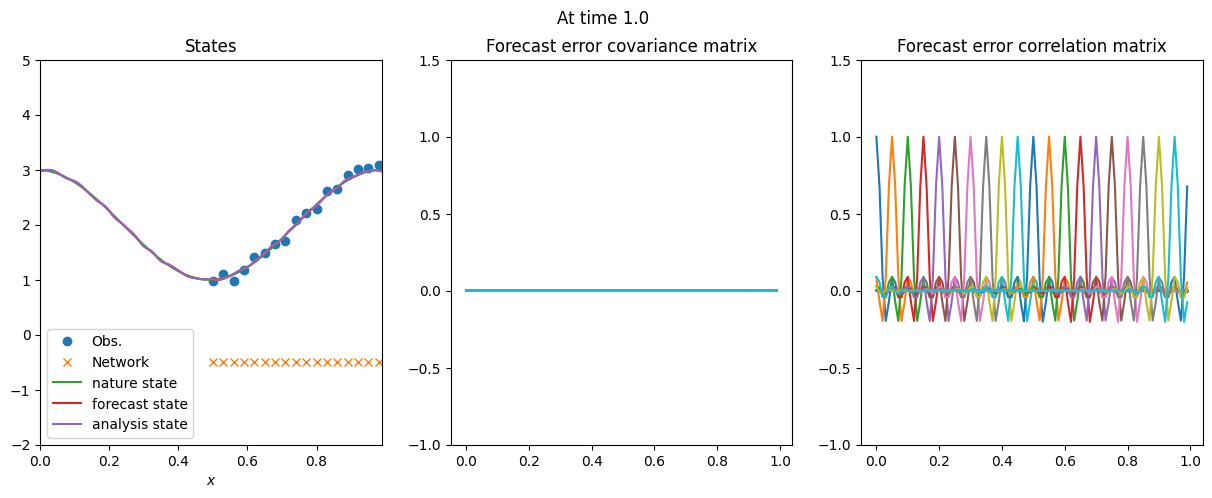

In [23]:
animation_assim(SAVE)

<a id='Q3.4'/>

<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">    
<b>Q3.4 Analyser et interpréter les résultats des cycles d'assimilation de données.
    </b>
</div>

<div style="background:lightGreen">
<b>Conclusion intermédiaire:</b> <br> 
    L'estimation initiale de l'état est très mauvaise au niveau de la partie $x < 0.5$. En effet, dans cette partie, on ne dispose pas d'observations. Cependant, avec la propagation, les estimation permettent d'avoir un meilleure estimation de cette partie.
</div>

## 4. Distribution Gaussienne en grande dimension <a id='curse-dimensionality'/>

Dans la suite on considére un vecteur aléatoire de loi centrée réduite $$X\sim\mathcal{N}(0,\textbf{I}_n),$$
avec $n$ la dimension du vecteur.

In [71]:
from numpy.linalg import norm

In [84]:
n = 10000

N = 10
X = [np.random.normal(size=(n)) for k in range(N)]
print('Dimension: ',n)
print(f'Norme de {N} réalisations de X: \n', [norm(x) for x in X])
Y = [np.random.normal(size=(n)) for k in range(N)]
print(f'Cosinus de {N} couples de réalisations indépendantes:\n',[x@y.T/(norm(x)*norm(y)) for x,y in zip(X,Y)])

Dimension:  10000
Norme de 10 réalisations de X: 
 [99.56000158806764, 99.49620865231978, 99.22625381562331, 99.72500075108749, 99.92060006238859, 99.8966506863268, 99.84985090901179, 98.96102526894377, 99.7266954363449, 98.72134011213286]
Cosinus de 10 couples de réalisations indépendantes:
 [-0.038111292786359614, -0.007209489192708658, -0.00023848142952368544, 0.007147773841064884, 0.003549847200611186, 0.006053071146180889, -0.011618632591911147, 0.008121369616334303, 0.010971127517009816, 0.0021666638278108473]


<a id='Q4.1'/>

<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">    
<b>Q4.1  Exploration des échantillons d'une Gaussienne: <br>
    <ol>
        <li>Comment se répartissent des réalisations indépendantes d'un tel vecteur en dimension $n=1$ et $n=2$</li>
        <li>Observer le résultat du calcul de la norme et du cosinus de l'angles pour des réalisations indépendantes du vecteur $X$ en prenant successivement pour $n$ les valeurs suivantes: $\{10,100,10000,100000\}$.</li>
        <li>Analysez ces résultats, et proposer une interprétation géométrique de la répartition des vecteurs dans $\R^n$ pour $n$ grand et les uns par rapport aux autres (dans le cas d'un échantillon de taille finie)</li>
        <li>Démontrez mathématiquement les résultats que vous avez observés</li>
        <li>Dressez une conclusion intermédiaire</li>
    </ol>    
    </b>
</div>

<div style="background:">
<b>Réponse:</b> <br> 
</div>

1) 
n = 1 : gaussienne centrée en 0, avec une variance de 1.
les lignes de niveau sont des droites parallèles à l'axe des abscisses.

n = 2 : gaussienne 2D centrée en 0, avec une variance de 1.
les lignes de niveau sont des cercles centrées en 0, avec une variance de 1.

3) $||X|| = \sqrt{n} + \epsilon$ 

4) $\frac{1}{n} \sum{X_i^2} = 1 + \sqrt{\frac{2}{n}} \epsilon$

$||X|| = \sqrt{n}(1 + \epsilon \sqrt{\frac{2}{n}})^{\frac{1}{2}} \simeq \sqrt{n}(1 + \frac{1}{2} \epsilon \sqrt{\frac{2}{n}})$ (Taylor)

$||X|| \simeq \sqrt{n} + \frac{\epsilon}{\sqrt{n}}$

$||X|| \sim \mathcal{N}(\sqrt{n}, \frac{1}{2})$

5) 


## 5. Conclusion et perspective <a id='conclusion'/>

<a id='Q5'/>

<div style="margin:0 10% 0 10%; background:rgb(255,230,230)">    
<b>Q5  Conclure réalisé (conlusions ET perspectives) <br>
    </b>
</div>

<div style="background:">
<b>Conclusion finale:</b> <br> 
</div>
Conclusion :
Le TP sur le filtre de Kalman a fourni une immersion pratique dans son fonctionnement et ses applications. En consolidant nos connaissances théoriques et en mettant en œuvre le filtre dans des situations réelles, nous avons acquis une compréhension concrète. Les perspectives futures incluent l'exploration des applications spécifiques du filtre dans des domaines tels que la fusion de capteurs et le suivi de trajectoire. L'exploration de variantes comme l'EKF ou le UKF ainsi que l'intégration dans des projets réels permettront d'évaluer son efficacité pratique. En résumé, ce TP a jeté les bases pour des explorations plus approfondies du filtre de Kalman dans le domaine de l'exploration numérique.
Cependant, en grande dimension, cette application est irréaliste. La suite du cours cherche donc à nous montrer d'autres méthodes qui nous permettent de résoudre de grands problèmes et d'utiliser un calculateur efficacement.

<h2 style="background:LightCoral">
    Envoyez le fichier .ipynb à l'adresse olivier.pannekoucke@meteo.fr <br><br>
    <center>avec en <b>objet du mail: _HPC_TD1 </b></center> 
</h2>

### References

[1]: markdown https://daringfireball.net/projects/markdown/syntax

[2]: Latex http://tex.loria.fr/general/apprends-latex.pdf
